<a href="https://colab.research.google.com/github/isil-slck/house-price-linear-regression/blob/main/ISIL_of_Complex_Linear_Regression_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

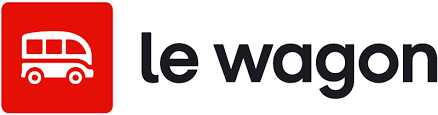

# Predicting house prices

It is used Linear Regression to try **to predict house prices in Ames, Iowa!**



## Import the Data

Load the data from this link!

[`Iowa_housing_prices.csv`](https://drive.google.com/file/d/1YgFv1_0-xl0blchMvhtUev4vzYX0BFGs/view?usp=sharing)



In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

df_Iowa = pd.read_csv('Iowa_housing_prices.csv')


In [2]:
df_Iowa.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Cleaning

### Handle NA values

Unlike the previous challenge, this dataset has not been cleaned!

Most important thing to take care of are NA values!

Which columns have missing values?

In [32]:
 df_Iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### To drop or to fill?

Some columns miss many more values than others!

Typically it would be droped columns that have more than 30% missing values. For the others, it would be filled them using an imputer.

In [34]:
# your code
for column in df_Iowa.columns:
  if df_Iowa[column].isnull().sum() > len(df_Iowa)*0.3:
    df_Iowa.drop(columns = [column],axis=1,inplace = True)
df_Iowa.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [35]:
#seperate numerical and categorical data

numeric_data = df_Iowa.select_dtypes(include=[np.number])
categorical_data = df_Iowa.select_dtypes(exclude=[np.number])

In [36]:
#check NaN
numeric_data[numeric_data['MasVnrArea'].isnull()]
#Id = 235 can check

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
234,235,60,NaN,7851,6,5,2002,2002,NaN,625,...,288,48,0,0,0,0,0,5,2010,216500
529,530,20,NaN,32668,6,3,1957,1975,NaN,1219,...,0,0,200,0,0,0,0,3,2007,200624
650,651,60,65.0,8125,7,6,2007,2007,NaN,0,...,0,0,0,0,0,0,0,5,2008,205950
936,937,20,67.0,10083,7,5,2003,2003,NaN,833,...,0,41,0,0,0,0,0,8,2009,184900
973,974,20,95.0,11639,7,5,2007,2008,NaN,0,...,0,120,0,0,0,0,0,12,2008,182000
977,978,120,35.0,4274,7,5,2006,2007,NaN,1106,...,0,116,0,0,0,0,0,11,2007,199900
1243,1244,20,107.0,13891,10,5,2006,2006,NaN,1386,...,216,229,0,0,0,0,0,9,2006,465000
1278,1279,60,75.0,9473,8,5,2002,2002,NaN,804,...,0,211,0,0,0,0,0,3,2008,237000


In [37]:
numeric_data['MasVnrArea'].mean()

np.float64(103.68526170798899)

In [38]:
#fill NaN value with mean for numeric columns
imputer = SimpleImputer(strategy='mean')

numeric_data.iloc[:, 1:-1] = imputer.fit_transform(numeric_data.iloc[:, 1:-1])

In [9]:
#check mean value

numeric_data[numeric_data['Id']== 235]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
234,235,60,70.049958,7851,6,5,2002,2002,103.685262,625,...,288,48,0,0,0,0,0,5,2010,216500


In [10]:
#fill NaN value with mode for categorical columns
imputer_categorical = SimpleImputer(strategy='most_frequent')
categorical_data.iloc[:,:] = imputer_categorical.fit_transform(categorical_data.iloc[:,:])


In [11]:
categorical_data.isnull().sum()

,0
MSZoning,0
Street,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0
LandSlope,0
Neighborhood,0
Condition1,0
Condition2,0


## Picking X and y

After data cleaning, we have 75 features available for modeling.
While domain expertise in real estate could help us manually select the most relevant features,
in this project, we will proceed by using all available features to build our prediction model.

the target variable is the house price. Let's assign the feature matrix `X` and the target vector `y` accordingly.


In [12]:
#concat our num and cat data
df_Iowa_new = pd.concat([numeric_data,categorical_data],axis=1)
df_Iowa_new.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [13]:
X = df_Iowa_new.drop(columns = ['SalePrice','Id']).copy()
y = df_Iowa_new['SalePrice']

### Train test split
Split the data into train and test!

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Normalization



### Numeric Values

Apply standartscaler only on numerical data!


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform = 'pandas')

X_train_num = X_train.select_dtypes(include='number')
X_test_num = X_test.select_dtypes(include='number')

#fit data

X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)


In [16]:
X_test_scaled.head()
X_train_scaled.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
254,-0.866764,-0.012882,-0.212896,-0.820445,0.372217,-0.455469,-1.346063,-0.601529,1.037269,-0.285504,...,-0.863837,1.188402,-0.714352,-0.351921,-0.121008,-0.275838,-0.070993,-0.09274,-0.133417,1.650065
1066,0.074110,-0.502773,-0.265245,-0.088934,1.268609,0.718609,0.439214,-0.601529,-0.971996,-0.285504,...,-0.456264,-0.740157,-0.138015,-0.351921,-0.121008,-0.275838,-0.070993,-0.09274,-0.508010,0.893677
638,-0.631546,-0.146488,-0.177841,-0.820445,1.268609,-1.988293,-1.683818,-0.601529,-0.971996,-0.285504,...,-2.257169,1.790113,-0.714352,2.290826,-0.121008,-0.275838,-0.070993,-0.09274,-0.508010,0.137290
799,-0.161109,-0.458237,-0.324474,-0.820445,1.268609,-1.107734,-1.683818,0.859231,0.267995,-0.285504,...,-1.119755,-0.740157,-0.714352,3.902257,-0.121008,-0.275838,-0.070993,-0.09274,-0.133417,-0.619098
380,-0.161109,-0.903592,-0.529035,-0.820445,0.372217,-1.531707,-1.683818,-0.601529,-0.496920,-0.285504,...,-0.797488,-0.740157,-0.714352,3.547742,-0.121008,-0.275838,-0.070993,-0.09274,-0.508010,1.650065


### Non-Numeric Values


Now, let's process the non-numeric (categorical) columns.
It is used `select_dtypes` to select columns with object or categorical data types.

After that, apply `OneHotEncoder`to convert them into a numerical format suitable for modeling.

In [39]:
from sklearn.preprocessing import OneHotEncoder

X_train_cat = X_train.select_dtypes(exclude='number')
X_test_cat = X_test.select_dtypes(exclude='number')

# Instanciate One hot encoder
ohe = OneHotEncoder(sparse_output = False,handle_unknown='ignore',drop='if_binary').set_output(transform='pandas')

# fit on all the X set because some data could miss in the train and appear in the test
#X_cat = X.select_dtypes(exclude='number')
#ohe.fit(X_cat)

# transform train and test set
X_train_encoded = ohe.fit_transform(X_train_cat)
X_test_encoded = ohe.transform(X_test_cat)

In [40]:
X_train_encoded.shape

(1168, 0)

Have a look at the encoded columns.

In [41]:
X_test_encoded.isnull().sum()

,0


### Recreate X
Recreate `X` now by combining (concatenating) the numeric and non-numeric normalized columns together! Call it `X_normalized`!

In [20]:
X_train_processed = pd.concat([X_train_scaled,X_train_encoded],axis=1)
X_test_processed = pd.concat([X_test_scaled,X_test_encoded],axis=1)

In [21]:
X_train_processed

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
254,-0.866764,-0.012882,-0.212896,-0.820445,0.372217,-0.455469,-1.346063,-0.601529,1.037269,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1066,0.074110,-0.502773,-0.265245,-0.088934,1.268609,0.718609,0.439214,-0.601529,-0.971996,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
638,-0.631546,-0.146488,-0.177841,-0.820445,1.268609,-1.988293,-1.683818,-0.601529,-0.971996,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
799,-0.161109,-0.458237,-0.324474,-0.820445,1.268609,-1.107734,-1.683818,0.859231,0.267995,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
380,-0.161109,-0.903592,-0.529035,-0.820445,0.372217,-1.531707,-1.683818,-0.601529,-0.496920,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-0.866764,0.343402,-0.127631,-0.088934,-0.524174,1.142582,1.018222,-0.601529,-0.919694,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1130,-0.161109,-0.235559,-0.268313,-1.551955,-2.316957,-1.401254,-1.683818,-0.601529,0.383495,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1294,-0.866764,-0.458237,-0.234096,-0.820445,1.268609,-0.520696,0.246211,-0.601529,-0.608062,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
860,-0.161109,-0.680915,-0.283376,0.642577,2.165000,-1.727387,0.632217,-0.601529,-0.971996,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

linear_reg.fit(X_train_processed,y_train)


LinearRegression()

### Calculate the MAE

Let's now calculate the mean absolute error of the model on the test set.

In [23]:
from sklearn.metrics import mean_absolute_error

y_pred_lin = linear_reg.predict(X_test_processed)

mean_absolute_error(y_test, y_pred_lin)


18375.92590078048

This means, on average, the model's predictions are off by around $18,376.

# Let's select a few features

Let's try to improve the model by selecting only the most relevant features.


## Improve our model

Let's try with fewer features. Select features that are relevant to predict the SalePrice.

It can be started with the following features ['LotArea', 'LotConfig', 'LotShape', 'MSZoning', 'BldgType', 'Neighborhood', 'GarageCars']


In [24]:
select_features = ['LotArea', 'LotConfig', 'LotShape', 'MSZoning', 'BldgType', 'Neighborhood', 'GarageCars']

Split you data.

In [25]:
X = df_Iowa_new[select_features]
y = df_Iowa_new['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [26]:
X.head()

,LotArea,LotConfig,LotShape,MSZoning,BldgType,Neighborhood,GarageCars
0,8450,Inside,Reg,RL,1Fam,CollgCr,2
1,9600,FR2,Reg,RL,1Fam,Veenker,2
2,11250,Inside,IR1,RL,1Fam,CollgCr,2
3,9550,Corner,IR1,RL,1Fam,Crawfor,3
4,14260,FR2,IR1,RL,1Fam,NoRidge,3


Let's normalize the data

In [27]:
scaler = StandardScaler()
X_train['LotArea'] = scaler.fit_transform(X_train[['LotArea']])
X_test['LotArea'] = scaler.transform(X_test[['LotArea']])

Encode the categorical features.

In [28]:
X_train_cat = X_train.select_dtypes(exclude='number')
X_test_cat = X_test.select_dtypes(exclude='number')

ohe = OneHotEncoder(sparse_output = False).set_output(transform='pandas')

# transform train and test set
X_train[ohe.get_feature_names_out()] = ohe.fit_transform(X_train_cat)
X_test[ohe.get_feature_names_out()] = ohe.transform(X_test_cat)

In [29]:
# drop old columns

X_train.drop(columns=X_train_cat.columns, inplace=True)
X_test.drop(columns=X_test_cat.columns, inplace=True)

Let's try again with a Linear regression.

In [30]:
model = LinearRegression()

model.fit(X_train, y_train)

model_pred = model.predict(X_test)

mean_absolute_error(y_test, model_pred)

33459.72652976659

This means, on average, the model's predictions are off by around $33,460.

The model's performance worsened, with the MAE increasing.

This highlights that simply reducing the number of features is not always beneficial.

A careful balance between feature selection, domain understanding, and model complexity is necessary for better results.

# Random Forest Model

All of the above are out of scope for the DA bootcamp, but it's worth knowing about them! We've coded a cell below that uses a **Random Forest Model** to predict house prices! Try to see if you can make some sense of it.

P.S.: You might need to adjust some variable names if we weren't able to guess them right.

In [31]:
from sklearn.ensemble import RandomForestRegressor

X_train = X_train_processed
X_test = X_test_processed
y_train = y_train
y_test = y_test


rf = RandomForestRegressor(n_estimators=100, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_rf

17491.533047945206

The new MAE should be somewhere around $17,500 now, which is a much more acceptable error for a house price!

In [42]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
254,-0.866764,-0.012882,-0.212896,-0.820445,0.372217,-0.455469,-1.346063,-0.601529,1.037269,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1066,0.074110,-0.502773,-0.265245,-0.088934,1.268609,0.718609,0.439214,-0.601529,-0.971996,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
638,-0.631546,-0.146488,-0.177841,-0.820445,1.268609,-1.988293,-1.683818,-0.601529,-0.971996,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
799,-0.161109,-0.458237,-0.324474,-0.820445,1.268609,-1.107734,-1.683818,0.859231,0.267995,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
380,-0.161109,-0.903592,-0.529035,-0.820445,0.372217,-1.531707,-1.683818,-0.601529,-0.496920,-0.285504,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
